# Part I - Prosper Loan Data Exploration
## by Ifeoluwa Atunde

## Introduction
> Prosper is a leading financial peer-to-peer lending company that provides a platform where borrowers and lenders interact. The peer-to-peer lending platform market has been booming recently.Through these platforms, hundreds of investors earn, while thousands of borrowers receive funding more quickly.Although these platforms offer credit scores and basic borrower information to ensure that tradings are conducted in a secure atmosphere, there are still thousands of consumers who run the risk of losing money.
 



## Preliminary Wrangling


In [1]:
##import all necessary libraries and set plot to reflect inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import missingno as msno
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
# Ignore warning messages
import warnings
warnings.filterwarnings('ignore')
# Format Figure Size
plt.rcParams["axes.grid"] = False
plt.style.use('default')

In [2]:
df = pd.read_csv('/Users/Lovable/downloads/prosperLoanData.csv')
print(df.shape)
df.head()

(113937, 81)


,ListingKey,ListingNumber,ListingCreationDate,CreditGrade,Term,LoanStatus,ClosedDate,BorrowerAPR,BorrowerRate,LenderYield,...,LP_ServiceFees,LP_CollectionFees,LP_GrossPrincipalLoss,LP_NetPrincipalLoss,LP_NonPrincipalRecoverypayments,PercentFunded,Recommendations,InvestmentFromFriendsCount,InvestmentFromFriendsAmount,Investors
0,1021339766868145413AB3B,193129,2007-08-26 19:09:29.263000000,C,36,Completed,2009-08-14 00:00:00,0.16516,0.1580,0.1380,...,-133.18,0.0,0.0,0.0,0.0,1.0,0,0,0.0,258
1,10273602499503308B223C1,1209647,2014-02-27 08:28:07.900000000,NaN,36,Current,NaN,0.12016,0.0920,0.0820,...,0.00,0.0,0.0,0.0,0.0,1.0,0,0,0.0,1
2,0EE9337825851032864889A,81716,2007-01-05 15:00:47.090000000,HR,36,Completed,2009-12-17 00:00:00,0.28269,0.2750,0.2400,...,-24.20,0.0,0.0,0.0,0.0,1.0,0,0,0.0,41
3,0EF5356002482715299901A,658116,2012-10-22 11:02:35.010000000,NaN,36,Current,NaN,0.12528,0.0974,0.0874,...,-108.01,0.0,0.0,0.0,0.0,1.0,0,0,0.0,158
4,0F023589499656230C5E3E2,909464,2013-09-14 18:38:39.097000000,NaN,36,Current,NaN,0.24614,0.2085,0.1985,...,-60.27,0.0,0.0,0.0,0.0,1.0,0,0,0.0,20


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
df.isna().sum()

ListingKey                         0
ListingNumber                      0
ListingCreationDate                0
CreditGrade                    84984
Term                               0
                               ...  
PercentFunded                      0
Recommendations                    0
InvestmentFromFriendsCount         0
InvestmentFromFriendsAmount        0
Investors                          0
Length: 81, dtype: int64

<AxesSubplot:>

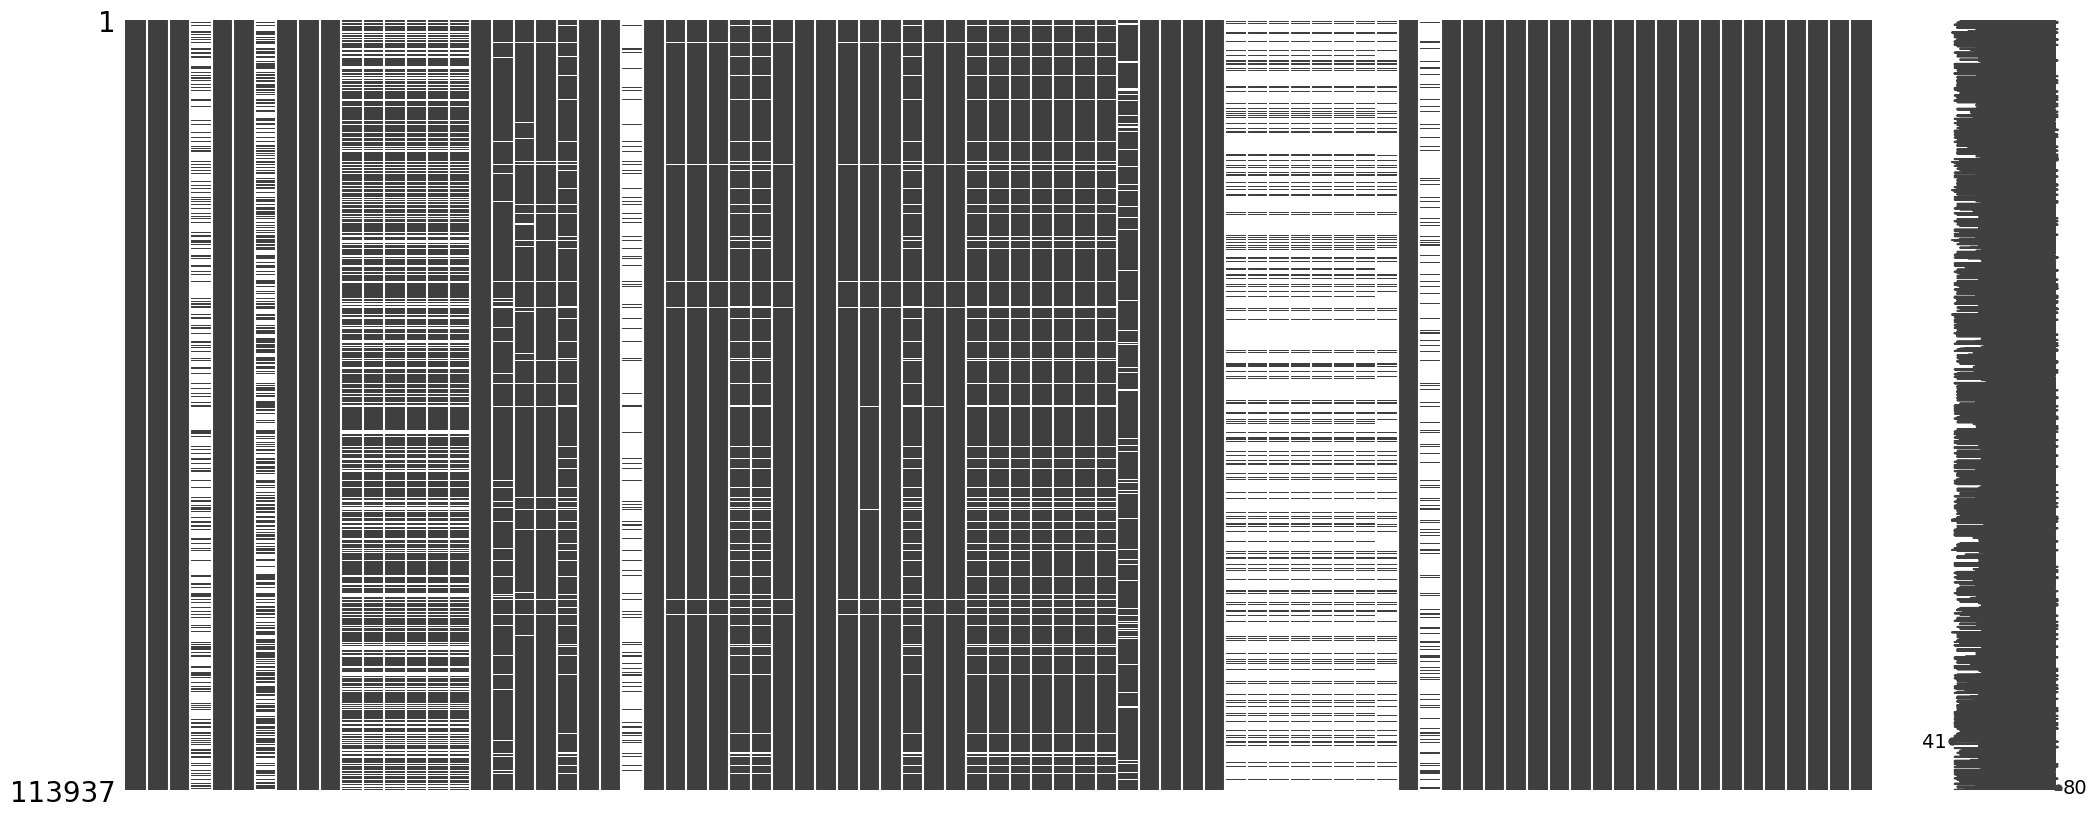

In [5]:
msno.matrix(df)

# Structure of dataset
> The Prosper loan dataset comprises of 113937 loan entries with 81 attributes on each loan, including loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others, from the year 2009-2014. There are two main categories:

1. Borrower information: Basic attributes of the borrowers such as annual income, condition of employment, interest rate, loan status, etc.
2. Loan performance information: Metrics evaluating the risk associated with the loans such as Prosper score and bank card utilization, etc.



# DATA Cleaning

>Dataset has 81 columns which is too large for our analysis, we need to create a new dataframe to wearhouse columns that will be important to this particular analysis. 
Access data in each column and identify elements that need to be fixed, in order to create interesting and trustworthy analyses and visualizations.

In [6]:
# Define features of interest for this analysis
features = ['ListingNumber','ListingCreationDate','ProsperRating (Alpha)','ProsperScore',\
            'ListingCategory (numeric)', 'Occupation','EmploymentStatus', \
            'IsBorrowerHomeowner', 'CurrentCreditLines', 'OpenRevolvingAccounts', 'DebtToIncomeRatio', \
            'IncomeVerifiable', 'LoanOriginalAmount', 'LoanStatus', \
            'CreditScoreRangeLower', 'CreditScoreRangeUpper','BorrowerState', \
            'LoanOriginationDate', 'IncomeRange','BorrowerAPR','BorrowerRate','StatedMonthlyIncome','Term','AvailableBankcardCredit','CreditGrade',]

In [7]:
##new subdataset
df_loan = df[features]
print(df_loan.info())
df_loan.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 25 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingNumber              113937 non-null  int64  
 1   ListingCreationDate        113937 non-null  object 
 2   ProsperRating (Alpha)      84853 non-null   object 
 3   ProsperScore               84853 non-null   float64
 4   ListingCategory (numeric)  113937 non-null  int64  
 5   Occupation                 110349 non-null  object 
 6   EmploymentStatus           111682 non-null  object 
 7   IsBorrowerHomeowner        113937 non-null  bool   
 8   CurrentCreditLines         106333 non-null  float64
 9   OpenRevolvingAccounts      113937 non-null  int64  
 10  DebtToIncomeRatio          105383 non-null  float64
 11  IncomeVerifiable           113937 non-null  bool   
 12  LoanOriginalAmount         113937 non-null  int64  
 13  LoanStatus                 11

,ListingNumber,ListingCreationDate,ProsperRating (Alpha),ProsperScore,ListingCategory (numeric),Occupation,EmploymentStatus,IsBorrowerHomeowner,CurrentCreditLines,OpenRevolvingAccounts,...,CreditScoreRangeUpper,BorrowerState,LoanOriginationDate,IncomeRange,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,AvailableBankcardCredit,CreditGrade
0,193129,2007-08-26 19:09:29.263000000,NaN,NaN,0,Other,Self-employed,True,5.0,1,...,659.0,CO,2007-09-12 00:00:00,"$25,000-49,999",0.16516,0.1580,3083.333333,36,1500.0,C
1,1209647,2014-02-27 08:28:07.900000000,A,7.0,2,Professional,Employed,False,14.0,13,...,699.0,CO,2014-03-03 00:00:00,"$50,000-74,999",0.12016,0.0920,6125.000000,36,10266.0,NaN
2,81716,2007-01-05 15:00:47.090000000,NaN,NaN,0,Other,Not available,False,NaN,0,...,499.0,GA,2007-01-17 00:00:00,Not displayed,0.28269,0.2750,2083.333333,36,NaN,HR
3,658116,2012-10-22 11:02:35.010000000,A,9.0,16,Skilled Labor,Employed,True,5.0,7,...,819.0,GA,2012-11-01 00:00:00,"$25,000-49,999",0.12528,0.0974,2875.000000,36,30754.0,NaN
4,909464,2013-09-14 18:38:39.097000000,D,4.0,2,Executive,Employed,True,19.0,6,...,699.0,MN,2013-09-20 00:00:00,"$100,000+",0.24614,0.2085,9583.333333,36,695.0,NaN


<Figure size 1000x600 with 0 Axes>

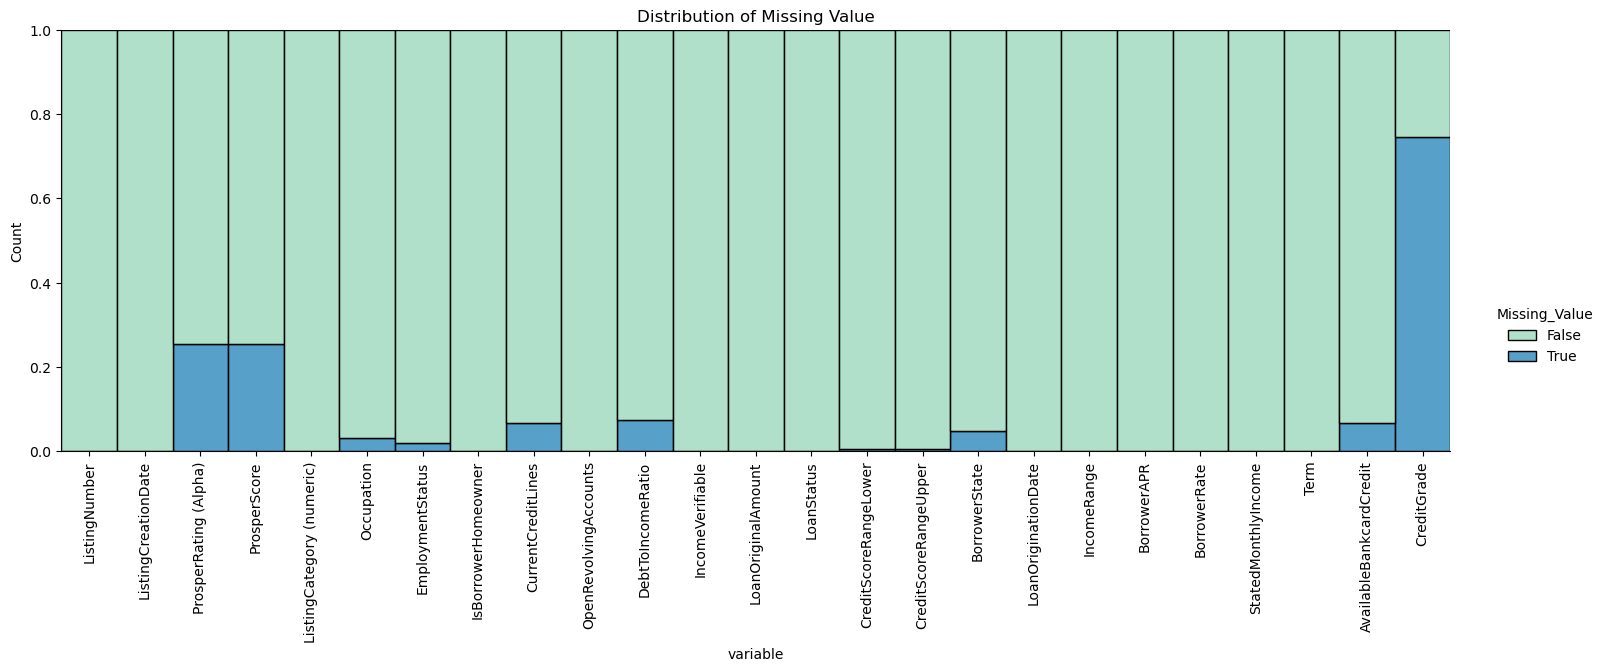

In [8]:
##Plot missing values
plt.figure(figsize=(10,6))
sns.displot(
    data=df_loan.isna().melt(value_name="Missing_Value"),
    x="variable",
    hue="Missing_Value",
    multiple="fill",
    aspect=3,
    palette = "YlGnBu"
);
plt.title('Distribution of Missing Value')
plt.xticks(rotation = 90);

Observation:
It is observed that credit grade has the highest count of missing data followed by ProsperRating (Alpha) and ProsperScore as well as debt to income ratio. For the numeric data type we replace missing values with its mean while for strings we replace with NAN

In [9]:
df_loan.describe()

,ListingNumber,ProsperScore,ListingCategory (numeric),CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,LoanOriginalAmount,CreditScoreRangeLower,CreditScoreRangeUpper,BorrowerAPR,BorrowerRate,StatedMonthlyIncome,Term,AvailableBankcardCredit
count,1.139370e+05,84853.000000,113937.000000,106333.000000,113937.00000,105383.000000,113937.00000,113346.000000,113346.000000,113912.000000,113937.000000,1.139370e+05,113937.000000,106393.000000
mean,6.278857e+05,5.950067,2.774209,10.317192,6.96979,0.275947,8337.01385,685.567731,704.567731,0.218828,0.192764,5.608026e+03,40.830248,11210.225447
std,3.280762e+05,2.376501,3.996797,5.457866,4.63097,0.551759,6245.80058,66.458275,66.458275,0.080364,0.074818,7.478497e+03,10.436212,19818.361309
min,4.000000e+00,1.000000,0.000000,0.000000,0.00000,0.000000,1000.00000,0.000000,19.000000,0.006530,0.000000,0.000000e+00,12.000000,0.000000
25%,4.009190e+05,4.000000,1.000000,7.000000,4.00000,0.140000,4000.00000,660.000000,679.000000,0.156290,0.134000,3.200333e+03,36.000000,880.000000
50%,6.005540e+05,6.000000,1.000000,10.000000,6.00000,0.220000,6500.00000,680.000000,699.000000,0.209760,0.184000,4.666667e+03,36.000000,4100.000000
75%,8.926340e+05,8.000000,3.000000,13.000000,9.00000,0.320000,12000.00000,720.000000,739.000000,0.283810,0.250000,6.825000e+03,36.000000,13180.000000
max,1.255725e+06,11.000000,20.000000,59.000000,51.00000,10.010000,35000.00000,880.000000,899.000000,0.512290,0.497500,1.750003e+06,60.000000,646285.000000


In [10]:
df_loan['ProsperScore'] = df_loan['ProsperScore'].fillna(df_loan['ProsperScore'].mean())
df_loan['DebtToIncomeRatio'] = df_loan['DebtToIncomeRatio'].fillna(df_loan['DebtToIncomeRatio'].mean())

In [11]:
df_loan['Occupation'] = df_loan['Occupation'].fillna('Other')
df_loan['ProsperRating (Alpha)'] = df_loan['ProsperRating (Alpha)'].fillna("Invalid")
df_loan['CreditGrade'] = df_loan['CreditGrade'].fillna("No_Score")
df_loan['EmploymentStatus'] = df_loan['EmploymentStatus'].fillna('Not available')

In [12]:
###Identify the datatype of each column and make the necessary adjustment
df_loan.dtypes

ListingNumber                  int64
ListingCreationDate           object
ProsperRating (Alpha)         object
ProsperScore                 float64
ListingCategory (numeric)      int64
Occupation                    object
EmploymentStatus              object
IsBorrowerHomeowner             bool
CurrentCreditLines           float64
OpenRevolvingAccounts          int64
DebtToIncomeRatio            float64
IncomeVerifiable                bool
LoanOriginalAmount             int64
LoanStatus                    object
CreditScoreRangeLower        float64
CreditScoreRangeUpper        float64
BorrowerState                 object
LoanOriginationDate           object
IncomeRange                   object
BorrowerAPR                  float64
BorrowerRate                 float64
StatedMonthlyIncome          float64
Term                           int64
AvailableBankcardCredit      float64
CreditGrade                   object
dtype: object

In [13]:
# Convert 'ListingCreationDate' type from str to datetime 
df_loan['ListingCreationDate']=pd.to_datetime(df_loan['ListingCreationDate'])

# Extract date information from ListingCreationDate column
df_loan['date'] = df_loan['ListingCreationDate'].dt.date

# Extract year information from ListingCreationDate column
df_loan['year']= df_loan['ListingCreationDate'].dt.year

# Extract month information from ListingCreationDate column
df_loan['month'] = df_loan['ListingCreationDate'].dt.month

# Convert 'date' type from str to datetime 
df_loan['date']=pd.to_datetime(df_loan['date'])
# df_selected['year']=pd.to_datetime(df_selected['year'])

# Drop unused column
df_loan.drop(['ListingCreationDate'], axis=1, inplace=True)
# Convert 'LoanOriginationDate' type from str to datetime
df_loan['LoanOriginationDate'] = pd.to_datetime(df_loan['LoanOriginationDate'])

In [14]:
# Convert 'Month' type  to str
df_loan['month']=df_loan['month'].astype(str)
# replacing numerical values of month with month names
df_loan.month=df_loan.month.replace([ '1', '2','3','4','5','6','7','8', '9','10','11','12'], ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])

# check the correction
df_loan['month'].unique()

array(['Aug', 'Feb', 'Jan', 'Oct', 'Sept', 'Dec', 'Apr', 'May', 'Jul',
       'Nov', 'Jun', 'Mar'], dtype=object)

In [15]:
#convert listnumber from int to str
df_loan['ListingNumber']=df_loan['ListingNumber'].astype(str)
##Convert prosperscore from float to int
df_loan['ProsperScore']=df_loan['ProsperScore'].astype(int)

In [16]:
df_loan['ListingCategory (numeric)'].unique()

array([ 0,  2, 16,  1,  7, 13,  6, 15, 20, 19,  3, 18,  8,  4, 11, 14,  5,
        9, 17, 10, 12])

In [17]:
##replace  ListingCategory (numeric) to match description in the data dictionary
list_ca = {0 : 'Not Available', 1 : 'Debt Consolidation', 2 : 'Home Improvement', 3: 'Business', 
             4 : 'Personal Loan', 5 : 'Student Use', 6 : 'Auto', 7 : 'Other', 8 : 'Baby&Adoption', 
             9 : 'Boat', 10 : 'Cosmetic Procedure', 11 : 'Engagement Ring', 12 : 'Green Loans',
             13 : 'Household Expenses', 14 : 'Large Purchases', 15 : 'Medical/Dental', 16 : 'Motorcycle',
             17 : 'RV', 18 : 'Taxes', 19 : 'Vacation', 20 : 'Wedding Loans'}

df_loan['ListingCategory'] = df_loan['ListingCategory (numeric)'].map(list_ca)
df_loan.drop(['ListingCategory (numeric)'], axis=1, inplace=True)

In [18]:
# convert string to ordinal category type
ordinal_rating = ['AA', 'A', 'B', 'C', 'D', 'E','HR']
ordered_var = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_rating)
df_loan['ProsperRating'] = df_loan['ProsperRating (Alpha)'].astype(ordered_var)

In [19]:
df_loan.dtypes

ListingNumber                      object
ProsperRating (Alpha)              object
ProsperScore                        int64
Occupation                         object
EmploymentStatus                   object
IsBorrowerHomeowner                  bool
CurrentCreditLines                float64
OpenRevolvingAccounts               int64
DebtToIncomeRatio                 float64
IncomeVerifiable                     bool
LoanOriginalAmount                  int64
LoanStatus                         object
CreditScoreRangeLower             float64
CreditScoreRangeUpper             float64
BorrowerState                      object
LoanOriginationDate        datetime64[ns]
IncomeRange                        object
BorrowerAPR                       float64
BorrowerRate                      float64
StatedMonthlyIncome               float64
Term                                int64
AvailableBankcardCredit           float64
CreditGrade                        object
date                       datetim

In [20]:
# Print descriptive statistics for some selected numeric variables
df_loan[['CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate']].describe()

,CurrentCreditLines,OpenRevolvingAccounts,DebtToIncomeRatio,LoanOriginalAmount,StatedMonthlyIncome,BorrowerAPR,BorrowerRate
count,106333.000000,113937.00000,113937.000000,113937.00000,1.139370e+05,113912.000000,113937.000000
mean,10.317192,6.96979,0.275947,8337.01385,5.608026e+03,0.218828,0.192764
std,5.457866,4.63097,0.530643,6245.80058,7.478497e+03,0.080364,0.074818
min,0.000000,0.00000,0.000000,1000.00000,0.000000e+00,0.006530,0.000000
25%,7.000000,4.00000,0.150000,4000.00000,3.200333e+03,0.156290,0.134000
50%,10.000000,6.00000,0.230000,6500.00000,4.666667e+03,0.209760,0.184000
75%,13.000000,9.00000,0.310000,12000.00000,6.825000e+03,0.283810,0.250000
max,59.000000,51.00000,10.010000,35000.00000,1.750003e+06,0.512290,0.497500


# What is/are the main feature(s) of interest in your dataset?
> Investors are interested in higher return for ever risk taken while borrowers want the cheapest cost possible on borrowing.
from my analysis i will be investigating factors that influence borrowers rate as well as lenders rate. i am also interested in the properties of prosper rating metrics and how they are linked to default and completed loans?
Other factors listed below will also be investigated.
1. What's the average cost of borrowing (this will be determined by analyzing the interest rate on big loans as well as rate on small loan? 
2. What are the main factors affecting the interest rate?
3. what size of loans do borrowers usually take out from Prosper? Whats the criteria for accessing a big loan or a small loan.
4. is there any relationship between loan size and the current employment status?
5. Which category of listing takes the most loans and for what purpose?



# What features in the dataset do you think will help support your investigation into your feature(s) of interest?
>There are so many features to explore, I suppose that the following borrower features would have the largest effect on interest rate:

1. IncomeRange - The income range of the borrower at the time the listing was created.
2. DebToIncomeRatio - The debt to income ratio of the borrower at the time the credit profile was pulled.
3. Creditscore - The Credit rating that was assigned at the time the listing went live. Applicable for listings pre-2009 period and will only be populated for those listings.
4. ProsperRating - The Prosper Rating assigned at the time the listing was created between AA - HR. Applicable for loans originated after July 2009.
5. Collateral:A Borrower will be classified as a homowner if they have a mortgage on their credit profile or provide documentation confirming they are a homeowner.
5. Employment status......

It is important to note that this is not an exhaustive list of interest rate and loans determinant and  additional features might be required, as well as a deeper understanding of the decisions made by Prosper top management.

# Univariate Exploration
>In this section, i'll be analysing the distribution of some variables individually.

In [21]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 28 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   ListingNumber            113937 non-null  object        
 1   ProsperRating (Alpha)    113937 non-null  object        
 2   ProsperScore             113937 non-null  int64         
 3   Occupation               113937 non-null  object        
 4   EmploymentStatus         113937 non-null  object        
 5   IsBorrowerHomeowner      113937 non-null  bool          
 6   CurrentCreditLines       106333 non-null  float64       
 7   OpenRevolvingAccounts    113937 non-null  int64         
 8   DebtToIncomeRatio        113937 non-null  float64       
 9   IncomeVerifiable         113937 non-null  bool          
 10  LoanOriginalAmount       113937 non-null  int64         
 11  LoanStatus               113937 non-null  object        
 12  CreditScoreRange

# ProsperRating (Alpha)

### What is the distribution of Prosper Rating (Alpha)?

In [22]:
df_loan['ProsperRating (Alpha)'].value_counts()

Invalid    29084
C          18345
B          15581
A          14551
D          14274
E           9795
HR          6935
AA          5372
Name: ProsperRating (Alpha), dtype: int64

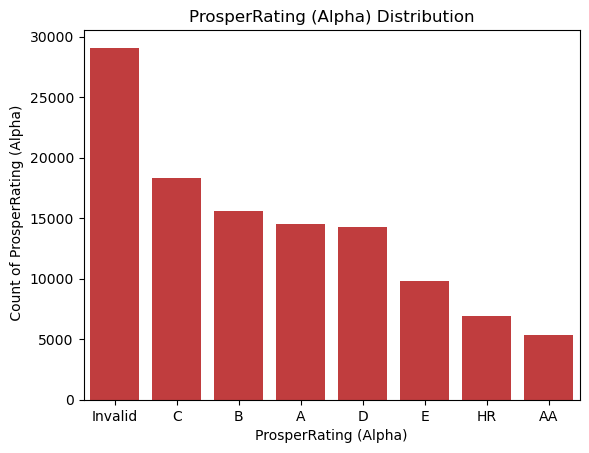

In [23]:
position = df_loan['ProsperRating (Alpha)'].value_counts().index
base_color = sns.color_palette()[3]
sns.countplot(data = df_loan, x = 'ProsperRating (Alpha)',color = base_color , order = position)
plt.title('ProsperRating (Alpha) Distribution');
plt.ylabel(' Count of ProsperRating (Alpha)');

Observation:
Prosper Rating  ranges from HR to AA(high to low risk) with a large porportion of rating missing as proper relied soly on rating from independent rating agencies prior to July 2009. from the diagram above it is observe that category c has the highest amount of loan disbursement. this is inline with reality as category is medium risk and most investors are speculators.

# Loan Status

### What is the distribution for Prosper Loan Status?

<Figure size 2000x2000 with 0 Axes>

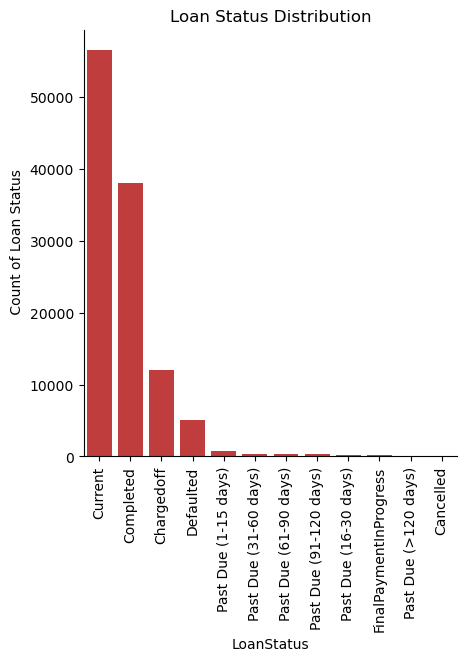

In [24]:
plt.figure(figsize=(20,20))
# Order the categorical variable 
status=df_loan.LoanStatus.value_counts().index
# Plot 
sns.catplot(data=df_loan, x='LoanStatus', order=status, color=base_color, kind = 'count')
plt.xticks(rotation=90);
plt.title('Loan Status Distribution');
plt.ylabel(' Count of Loan Status');

Observation :
Loan Status existing in multiple categories, therefore we need to aggregate variables such as 'Past Due' which differs only in maturity.

In [25]:
# Aggregate Past Due loans 
df_loan['LoanStatus'] = df_loan['LoanStatus'].apply(lambda x: x if 'Past Due' not in x else 'Past Due')

# Convert LoanStatus to a categorical variable
status = ['Defaulted','Chargedoff', 'Past Due', 'Current', 'FinalPaymentInProgress', 'Completed']

loan_status = pd.api.types.CategoricalDtype(ordered = True, categories = status)

df_loan['LoanStatus'] = df_loan['LoanStatus'].astype(loan_status)

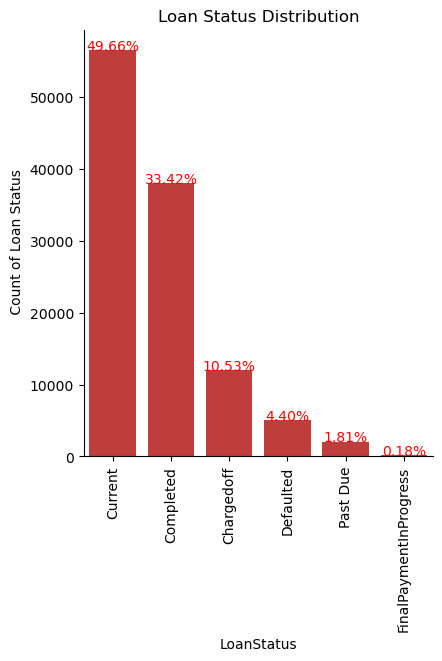

In [26]:
# Print the proportion below the bars 
n_loans=df_loan['LoanStatus'].value_counts().sum()
status_count=df_loan['LoanStatus'].value_counts()
status_order=status_count.index

sns.catplot(data=df_loan, x='LoanStatus', color=base_color, order=status_order, kind = 'count');

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_loans)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'red')
plt.title('Loan Status Distribution');
plt.ylabel(' Count of Loan Status');

Observation:
Proper currently has about 67% of its loan still running and 23.2% completed. However, about 8% of Prosper's loans were charged-off or defaulted. Moreover, the remaining 2.4% of loans has the status Past Due which is an aggregation of loan past due between 1 and 120 days.

# Debt to Income Ratio

### What is the Skewness of Debt to Income Ratio?

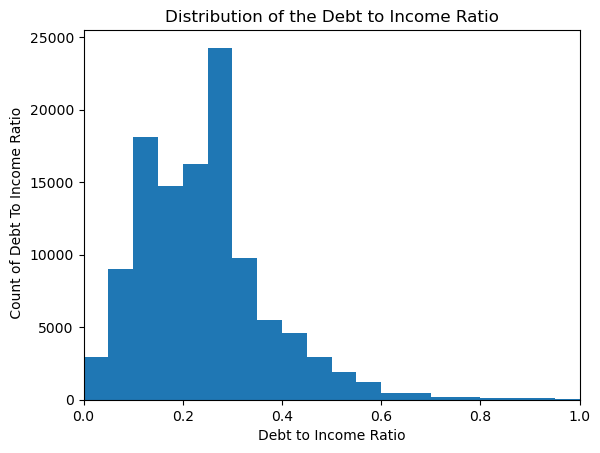

In [27]:
# Plot DebtToIncomeRatio
import numpy as np
binsize = 0.05
bins = np.arange(0, df_loan['DebtToIncomeRatio'].max()+binsize, binsize)
plt.hist(data = df_loan, x = 'DebtToIncomeRatio', bins = bins)
plt.xlabel('Debt to Income Ratio')
plt.xlim(0,1);
plt.title('Distribution of the Debt to Income Ratio');
plt.ylabel(' Count of Debt To Income Ratio');

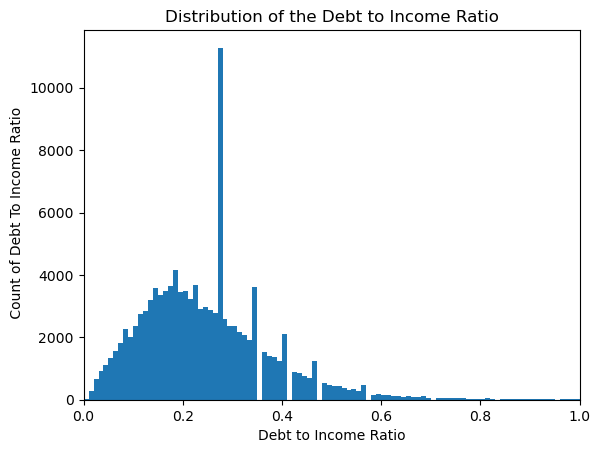

In [28]:
##Review the bin size to better analyse the distribution of the histogram
in_bins = np.arange(df_loan.DebtToIncomeRatio.min(), df_loan.DebtToIncomeRatio.max()+0.01, 0.01)
plt.hist(data=df_loan, x='DebtToIncomeRatio', bins=in_bins);
plt.xlim(0,1);
plt.xlabel('Debt to Income Ratio');
plt.title('Distribution of the Debt to Income Ratio');
plt.ylabel(' Count of Debt To Income Ratio');

Observation: 
The distribution of the DebtToIncomeRatio is highly skewed by the presence of borrowers with high incomes to debt ratio. In general, higher Debt To Income Ratio demonstrates that an individual has more debt compared to their income and this might affect how quick they can repay their loans. Inversely, lower DebtToIncomeRatio means a good balance between debt and income. It appears from the figure above that most borrowers who applied for a loan have a debt to income ratio around 30%

## Borrowers Occupation (sized by frequency)

### Which Occupation has the greatest access to Prosper Loans?

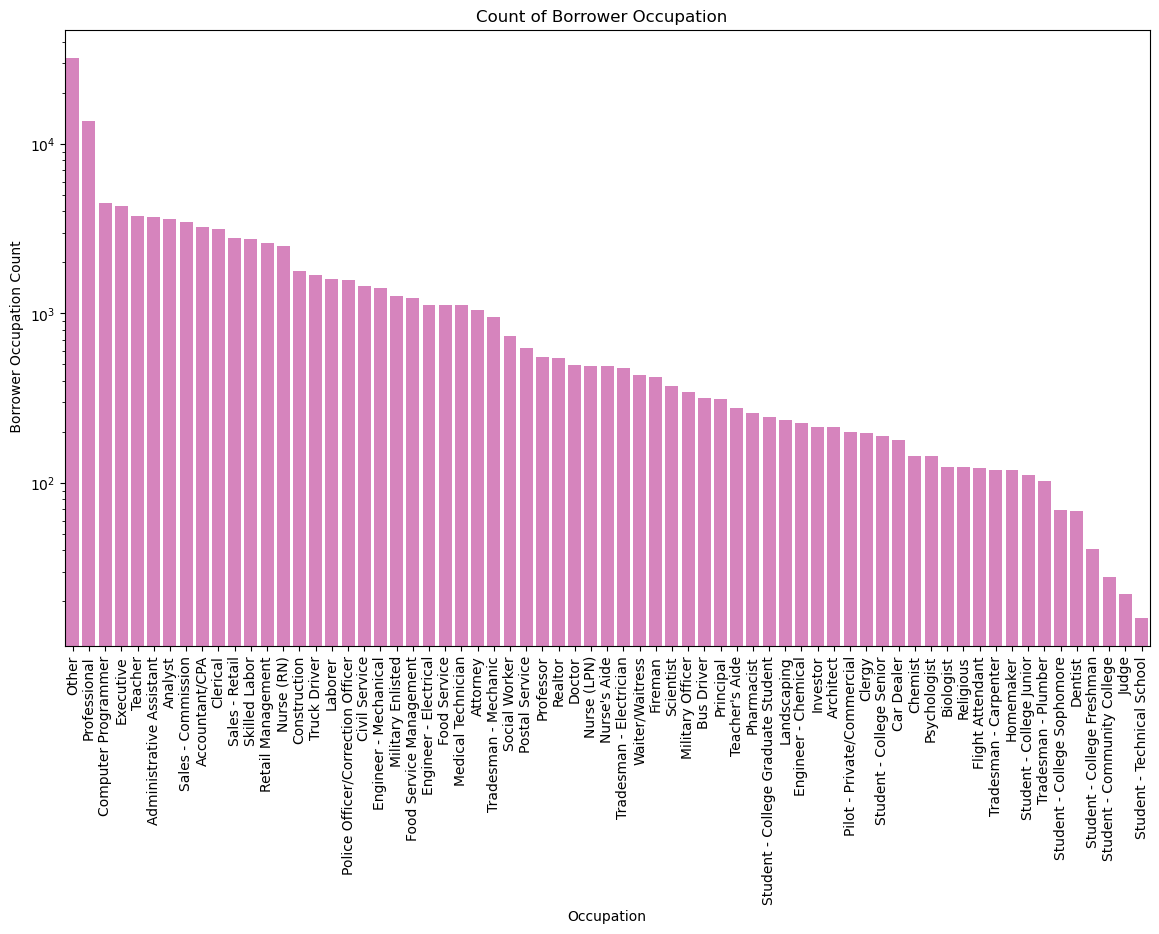

In [29]:
plt.subplots(figsize = [14,8])
type_order =df_loan['Occupation'].value_counts().index
base = sns.color_palette()[6]
g = sns.countplot(data=df_loan, x='Occupation', color=base, order=type_order);
plt.xticks(rotation=90)
plt.title('Count of Borrower Occupation  ');
g.set(yscale="log");
plt.ylabel(' Borrower Occupation Count');

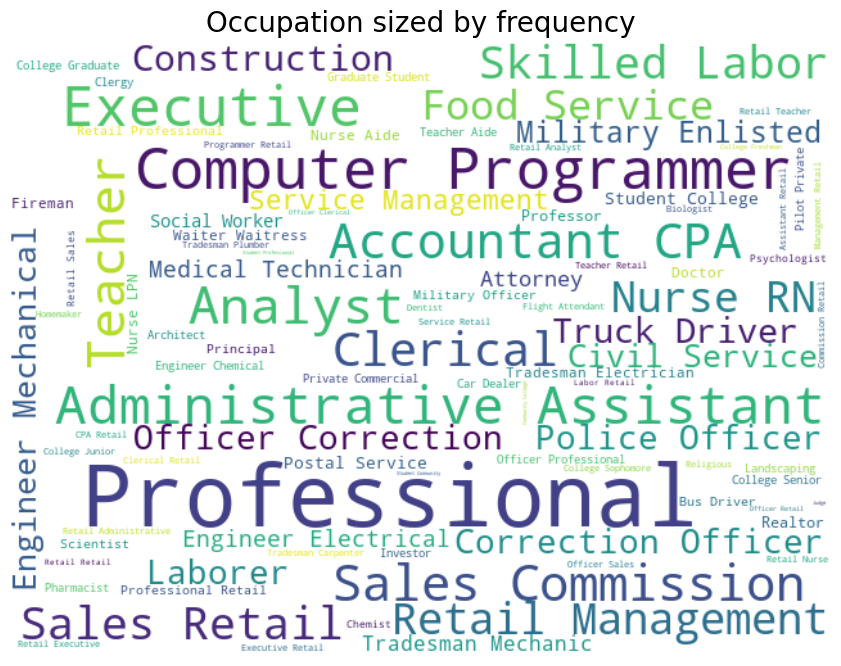

In [30]:
# Occupation sized by frequency
# Wordcloud 
text = df_loan.loc[:, 'Occupation'].str.cat(others=None, sep=' ')

# Instantiate word cloud object
wc = WordCloud(background_color='white', max_words=200, stopwords=STOPWORDS,
              width=640, height=480,contour_width=.01, 
                      contour_color='green')
# Generate word cloud
wc.generate(text)
# Show word cloud
plt.figure(figsize = [12, 8])
plt.imshow(wc, interpolation='bilinear')
plt.title('Occupation sized by frequency', fontsize=20)
plt.axis('off');

Observation: 
Most borrowers on Prosper indicate to be Professional, Computer Programmer, Administrative Assistant, Executive, Teacher, Analyst... All those people have chosen to borrow on Prosper instead of going to the conventional way and borrow from their commerciaL bank. This is could be due to an attractive interest rate offered for this categories of people. That what we will investigated later.

## Loan book Size

### What propotion of Prosper loan book existed before and after the introduction of Prosper Rating?

In [31]:
df_loan['year'].value_counts()

2013    35413
2012    19556
2007    11557
2011    11442
2008    11263
2014    10734
2006     6213
2010     5530
2009     2206
2005       23
Name: year, dtype: int64

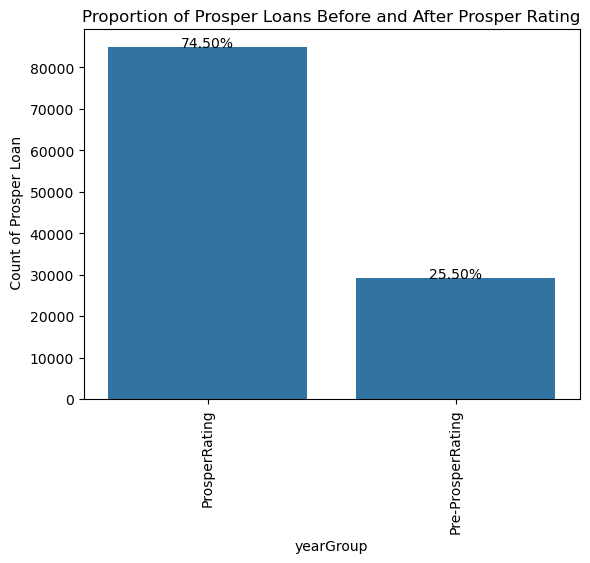

In [32]:
# define a classification function
def classify(row):
    """Sort year into a new category """
    if row["year"]<2009:
        return 'Pre-ProsperRating'
    else:
        return 'ProsperRating'

    
df_loan['yearGroup'] = df_loan.apply(classify, axis=1)

# convert string to ordinal category type
ordinal_class = ['Pre-ProsperRating','ProsperRating']
ordered_variabl = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_class)
df_loan['yearGroup'] = df_loan['yearGroup'].astype(ordered_variabl)

# Print the proportion below the bars 
n_loans=df_loan['yearGroup'].value_counts().sum()
status_count=df_loan['yearGroup'].value_counts()
status_order=status_count.index

base_color = sns.color_palette()[0]
sns.countplot(data=df_loan, x='yearGroup', color=base_color, order=status_order);

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):
    # get the text property for the label to get the correct count
    count = status_count[label.get_text()]
    pct_string = '{:0.2f}%'.format(100*count/n_loans)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')

plt.title('Proportion of Prosper Loans Before and After Prosper Rating');
plt.ylabel(' Count of Prosper Loan');

Observation: 
Prior to 2009, Credit Grade, a key indicator of credit risk for investors, was used. It was based on the borrower's credit score as reported by an impartial credit reporting bureau. However, at the time, Prosper's lending performance was not very good. Prosper established a new credit risk gauge, the Prosper Rating, which was viewed as harsher credit criteria for borrowers, after being temporarily shut down on the request of the SEC and restructuring. Prosper's loan default rate has dramatically decreased, according to the new loan performance. This is evident from the increase in prosper loan from 25.5% before 2009 to about 74.5% there after.

## Loan Original Amount

### How much can be accessed via Prosper Platform per time?

In [33]:
df_loan['LoanOriginalAmount'].value_counts()

4000     14333
15000    12407
10000    11106
5000      6990
2000      6067
         ...  
5284         1
7936         1
1201         1
10593        1
4292         1
Name: LoanOriginalAmount, Length: 2468, dtype: int64

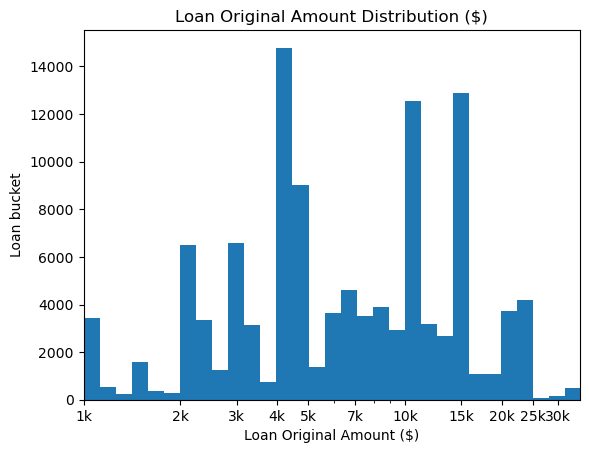

In [34]:
# plot the loan original amount against a log scale because it has a long tail
def loan_amount():
    """ Group loan amount to its respective bucket"""
    log_binsize = 0.05
    bins_log = 10 ** np.arange(3, np.log10(df_loan['LoanOriginalAmount'].max())+log_binsize, log_binsize)
    plt.hist(data = df_loan, x = 'LoanOriginalAmount', bins = bins_log)
    plt.xscale('log')
    x_ticks = [1000, 2000, 3000, 4000, 5000,7000, 10000, 15000,20000,25000, 30000]
    x_ticks_names = ['1k','2k', '3k', '4k', '5k', '7k', '10k','15k', '20k','25k','30k']
    plt.xticks(x_ticks, x_ticks_names)
    plt.xlim((1000,35000))
    plt.xlabel('Loan Original Amount ($)')
    plt.ylabel("Loan bucket")
    plt.title('Loan Original Amount Distribution ($)')
    
loan_amount()

Observation:
There are three significant peaks in the histogram above at 4K, 10K, and 15K. These three loan sizes appear to be the most popular ones offered to borrowers.

## Loan Categories

### How are Prosper loan categoried?

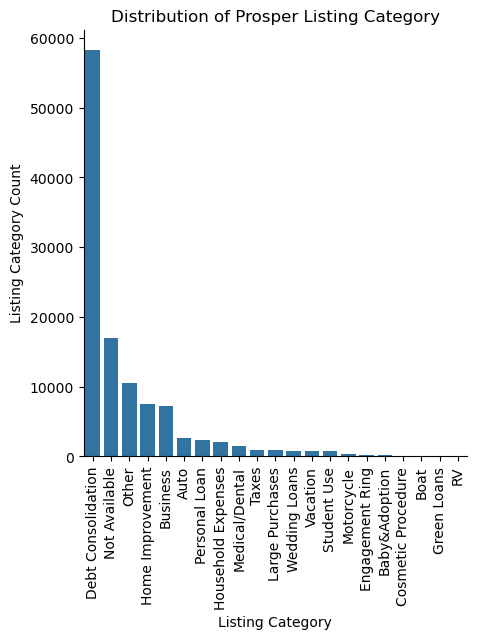

In [35]:
# loan purpose by category
categ_order = df_loan['ListingCategory'].value_counts().index
listing_counts = df_loan['ListingCategory'].value_counts()
sns.catplot(data = df_loan, x = 'ListingCategory', color = base_color, order=categ_order, kind = 'count')
plt.xlabel('Listing Category')
plt.xticks(rotation=90);
plt.title('Distribution of Prosper Listing Category');
plt.ylabel('Listing Category Count');

Observation: 
According to the aforementioned table, the majority listing category for successful loans is "Debt Consolidation." The loans by Listing Categories also includes major subcategories for business and some personal loans.

## Credit Grade Analysis

### How are borrowers profile on Prosper Platform?

In [36]:
df_loan['CreditGrade'].describe(), df_loan['CreditGrade'].value_counts()

(count       113937
 unique           9
 top       No_Score
 freq         84984
 Name: CreditGrade, dtype: object,
 No_Score    84984
 C            5649
 D            5153
 B            4389
 AA           3509
 HR           3508
 A            3315
 E            3289
 NC            141
 Name: CreditGrade, dtype: int64)

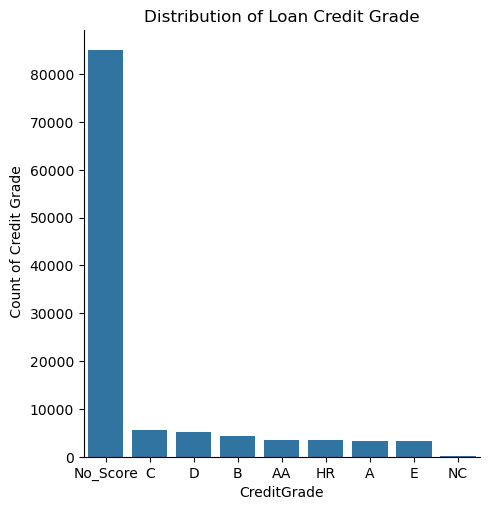

In [37]:
def Credit_Grade():
    """catplot made easy and repetitive """
    categ_order = df_loan['CreditGrade'].value_counts().index
    sns.catplot(data = df_loan, x = 'CreditGrade', color = base_color, order=categ_order, kind = 'count')
    plt.xlabel('CreditGrade')
    plt.title('Distribution of Loan Credit Grade');
    plt.ylabel(' Count of Credit Grade');
    plt.show()

Credit_Grade()

Observation: 
Propser introduced it own rating in 2009, prior to this it relied on ratings from independent rating organization this is the reason for the large number of missing credit grade which is now captured as No_score.

## Loan Tenor

### What loan tenor is most requested by borrowers on Prosper APP?

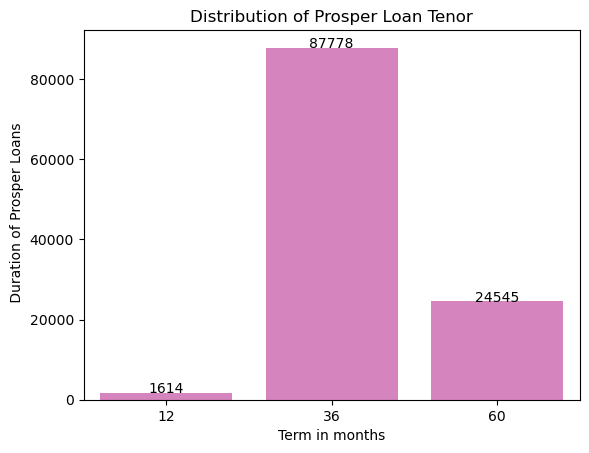

In [38]:
# Plot term of loans
sns.countplot(data=df_loan, x='Term', color=base)
plt.xlabel('Term in months');
locs, labels = plt.xticks()
ca_counts = df_loan['Term'].value_counts()

for loc, label in zip(locs, labels):
    count = ca_counts[float(label.get_text())]
    pct_string = '{}'.format(count)
    plt.text(loc, count, pct_string, ha = 'center', color = 'black');
plt.title('Distribution of Prosper Loan Tenor');
plt.ylabel(' Duration of Prosper Loans');

Observation:
A loan could last anywhere between one year and five years. The most prevalent kind is a 3-year (medium term) loan, followed by a 5-year loan. Short-term loans are rather rare.

## Wage Group

### What ths income distribution of an average Prosper borrower?

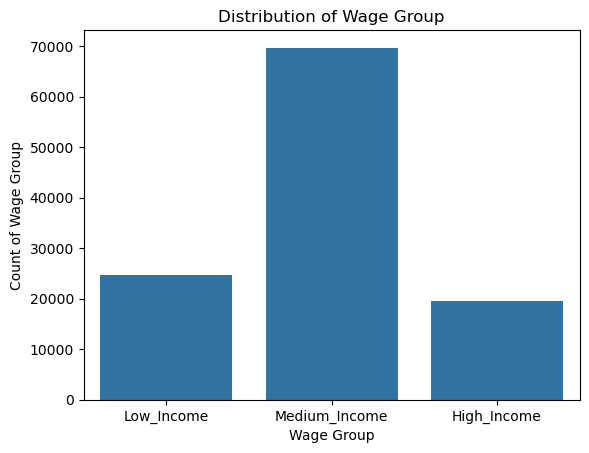

In [39]:
# define a classification function
def classify(row):
    """ Sort income into unique groups"""
    if row["StatedMonthlyIncome"]<3000:
        return 'Low_Income'
    if row["StatedMonthlyIncome"]<8000:
        return 'Medium_Income'
    else:
        return 'High_Income'
    
df_loan['WageGroup'] = df_loan.apply(classify, axis=1)

# convert string to ordinal category type
ordinal_class = ['Low_Income', 'Medium_Income', 'High_Income']
ordered_variabl = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_class)
df_loan['WageGroup'] = df_loan['WageGroup'].astype(ordered_variabl)

# Plot the new variable
sns.countplot(data = df_loan, x = 'WageGroup', color = base_color);
plt.title('Distribution of Wage Group');
plt.ylabel('Count of Wage Group');
plt.xlabel("Wage Group");

In [40]:
df_loan['WageGroup'].describe(), df_loan['WageGroup'].value_counts()

(count            113937
 unique                3
 top       Medium_Income
 freq              69714
 Name: WageGroup, dtype: object,
 Medium_Income    69714
 Low_Income       24663
 High_Income      19560
 Name: WageGroup, dtype: int64)

# Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

I used a log transform to analyse the data because there was a broad range of values for the loan initial amount variable. After the adjustment, the data show three peaks at 4K, 10K, and 15K. Additionally, I filled up the missing values for significant variables like credit grade and Prosperscore.

# Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

In terms of cleaning and tweaking, my main attention was on the levels of ordering factors that would make sense. I saw a significant difference between the highest and lowest counts in the occupancy chart. Log Scale was utilized in my chart.

# Bivariate Exploration

### is there correlation between all the variables used by Prosper in determining its rating?

In [41]:
# Numerical features
numeric_vars = [ 'CurrentCreditLines', 'OpenRevolvingAccounts',
               'DebtToIncomeRatio', 'LoanOriginalAmount', 'StatedMonthlyIncome', 'BorrowerAPR','BorrowerRate']
categoric_vars = ['IncomeRange', 'ProsperRatingCombined']

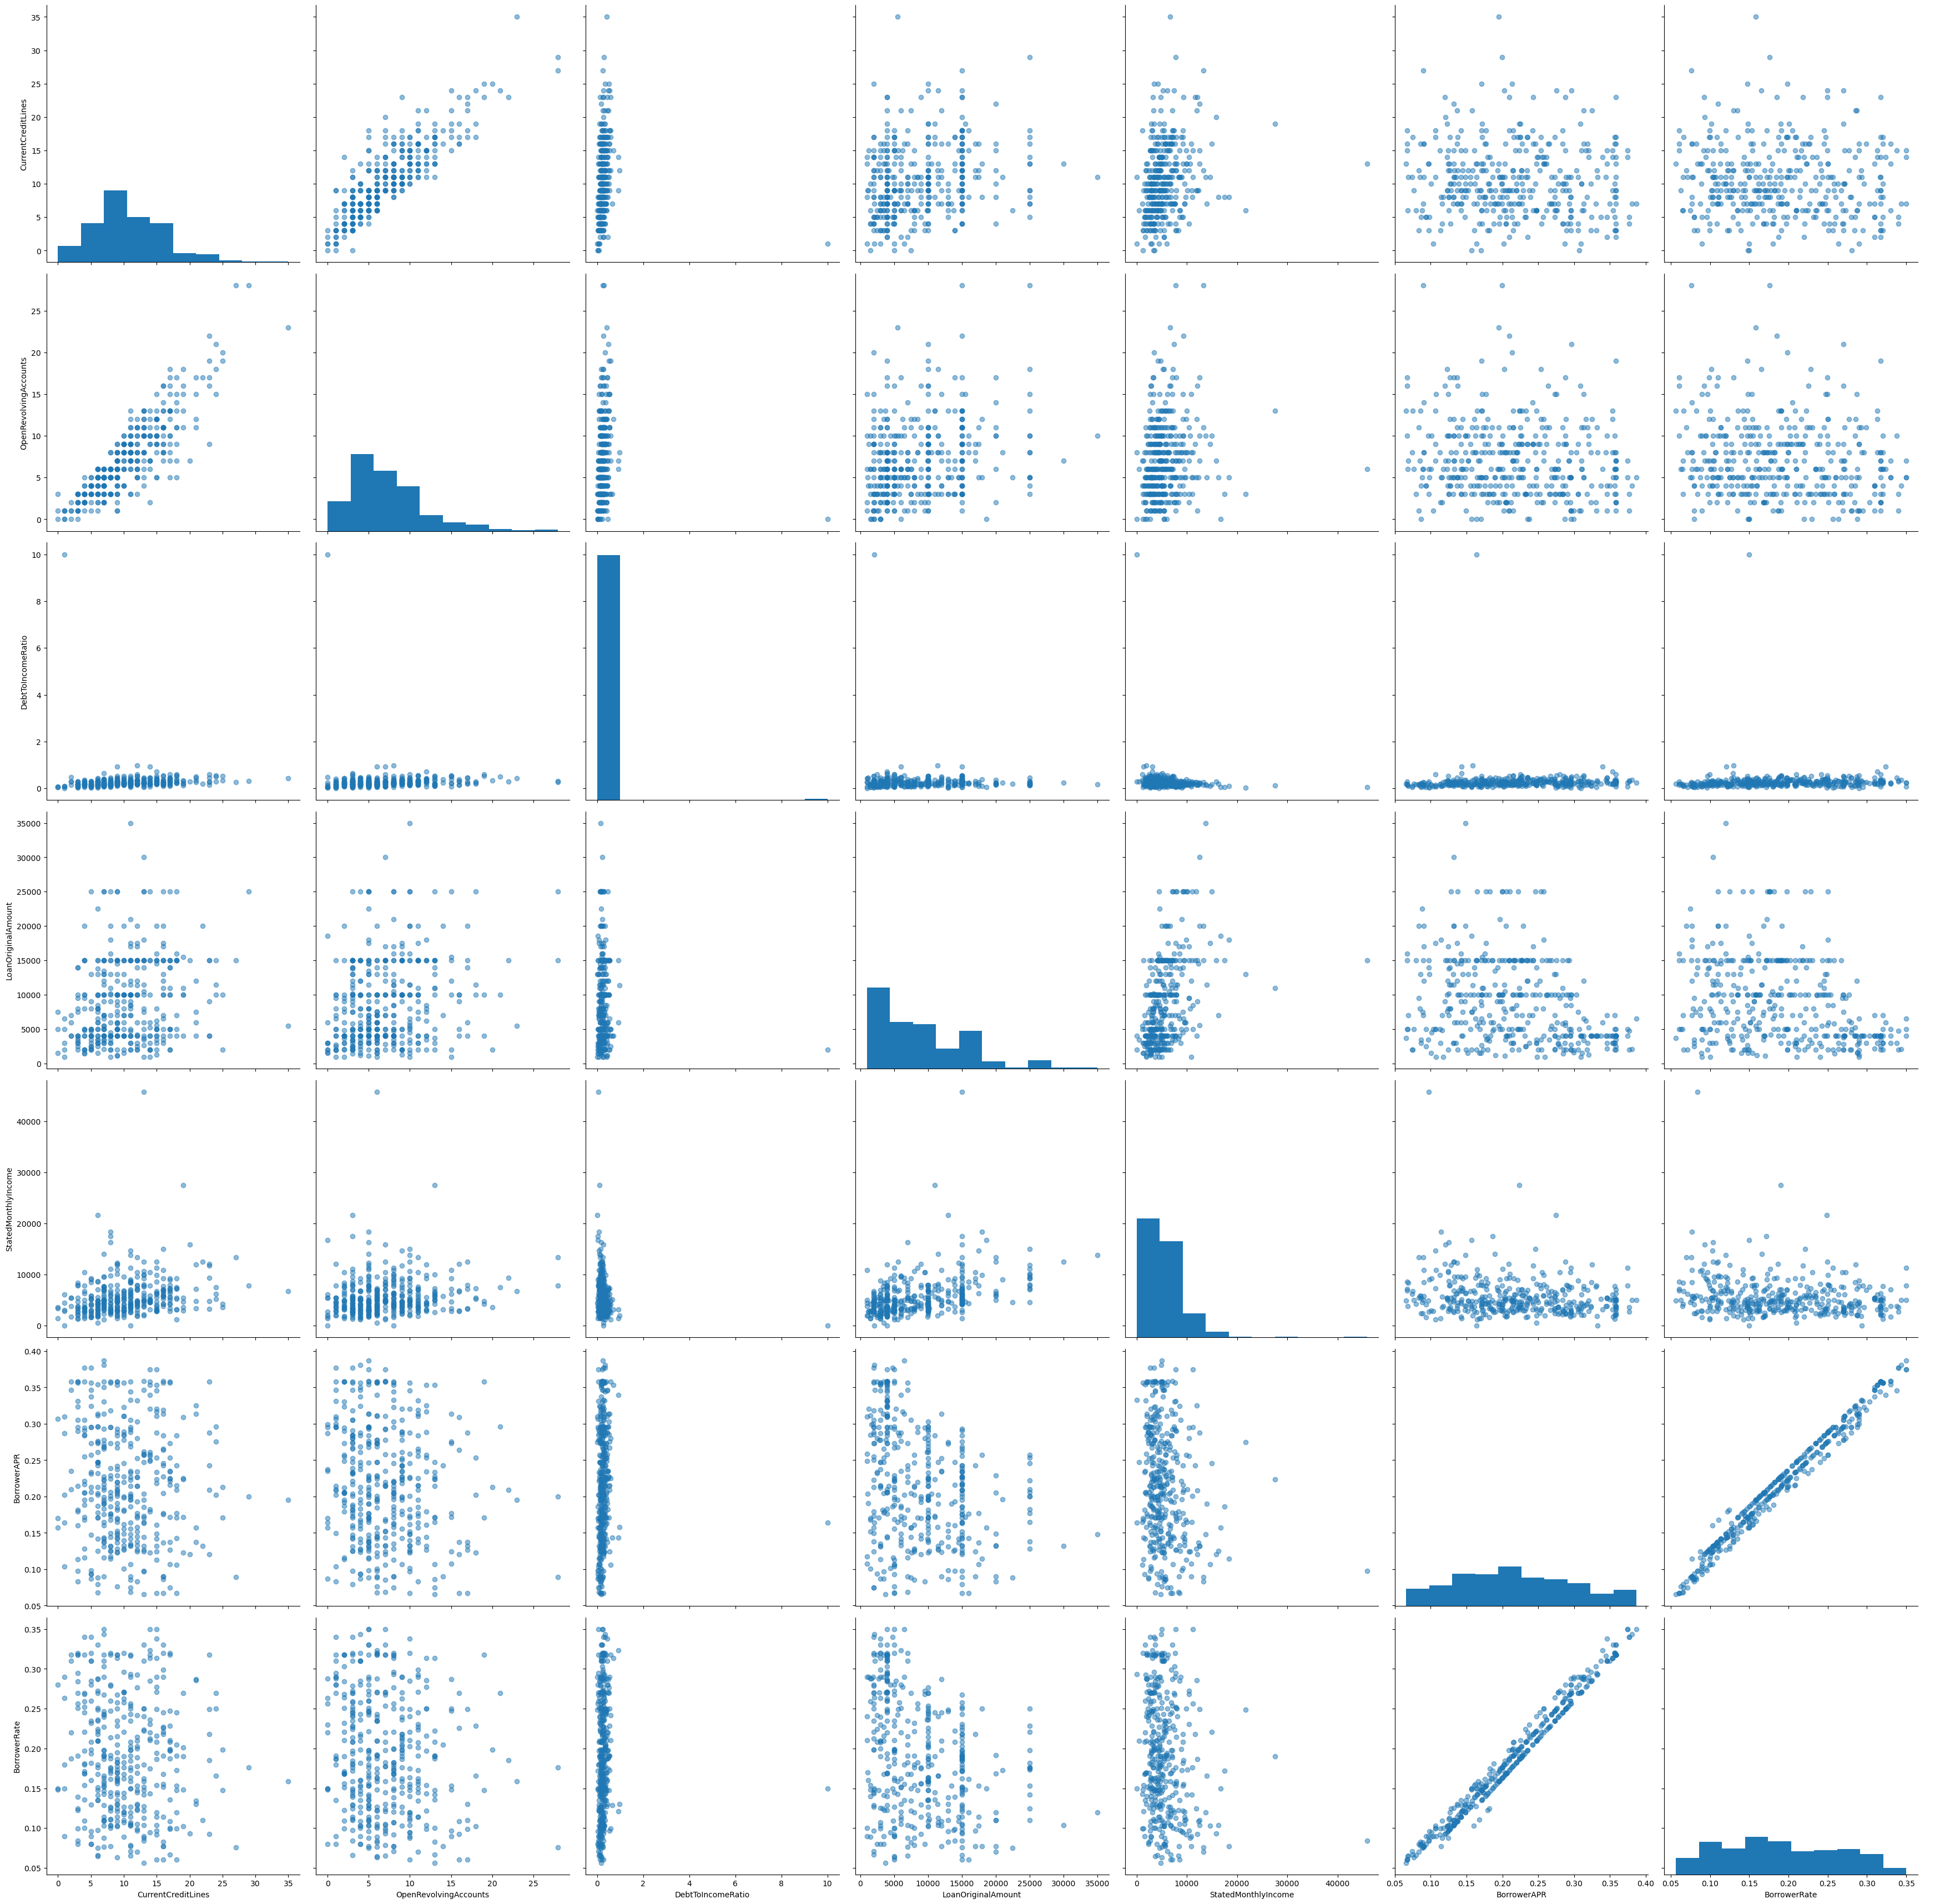

In [42]:
# plot matrix: Sample 400 loans to see the correlation between variables
samples = np.random.choice(df_loan.shape[0], 400, replace = False)
df_dummy = df_loan.reindex(samples)

# pair grid
g = sns.PairGrid(data = df_dummy, vars = numeric_vars, size = 5)
g = g.map_diag(plt.hist)
g.map_offdiag(plt.scatter, alpha = 0.5)
g.add_legend();

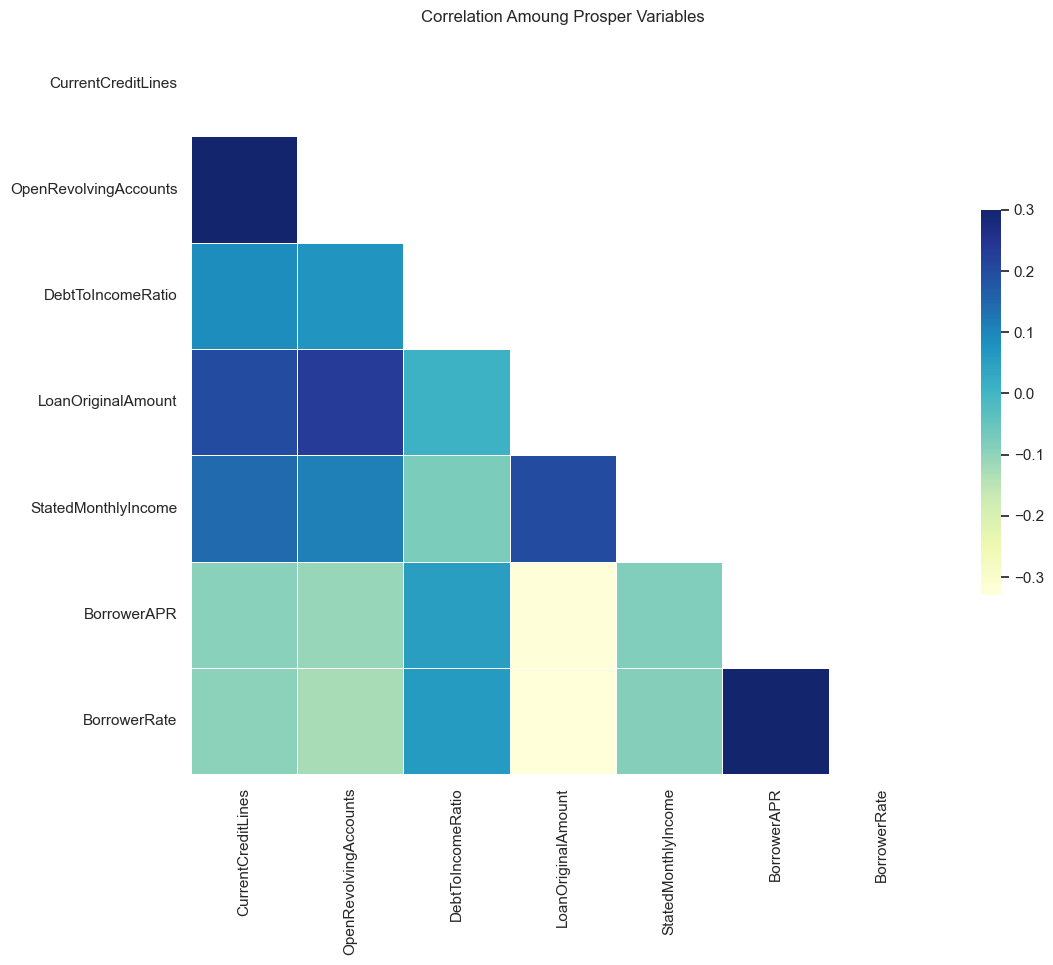

In [43]:
sns.set_theme(style="white")


# Compute the correlation matrix
corr = df_loan[numeric_vars].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="YlGnBu", vmax=.3, center=0,
            square=True, fmt = '.3f',linewidths=.5, cbar_kws={"shrink": .5})
plt.title('Correlation Amoung Prosper Variables');

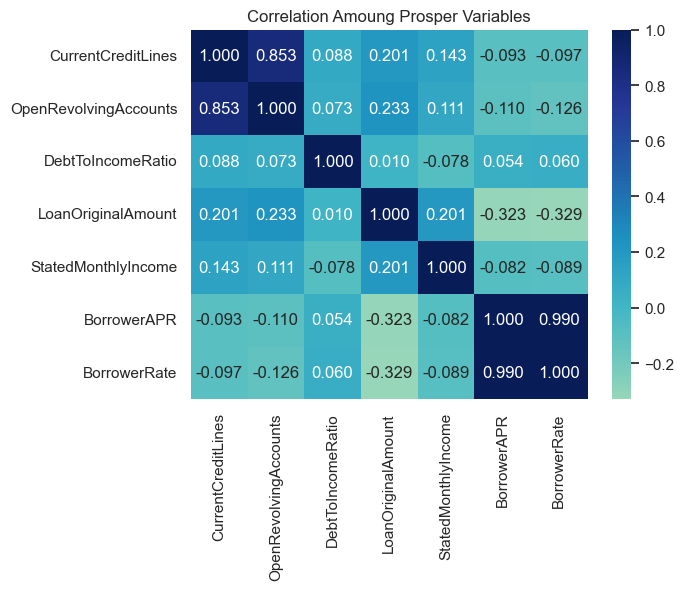

In [44]:
# correlation grid
sns.set_theme(style="white")
sns.heatmap(df_loan[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = "YlGnBu", center=0)
plt.title('Correlation Amoung Prosper Variables');
plt.show()

Observation:
>We have a fair understanding of the possible range of values thanks to the univariate exploration. We can keep outliers from skewing the plot by restricting the values on the axis. Otherwise, the majority of the points will resemble a vertical line.

As anticipated, there is a strong and positive correlation between the CurrentCreditLines and OpenRevolvingAccounts. The link between BorrowerRate and Borrower APR is also very significant (correlation coefficient of 0.993). 

Moreover, there is a moderate and negative correlation between interest rate and Loan amount.

The majority of the remaining factors, on the other hand, don't show a substantial correlation.

Let's now investigate the connections between these numerical variables, category variables, and ordinal variables.

## Relationship between Prosper and Credit score pre-2009 and post.

### What is the relationship between Prosper and Credit score pre-2009 and post.

Text(0.5, 0, 'Year Group')

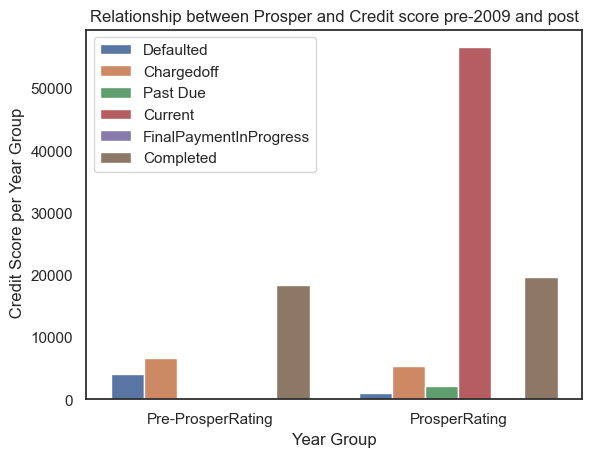

In [45]:
# define a classification function
def classify(row):
    if row["year"]<2009:
        return 'Pre-ProsperRating'
    else:
        return 'ProsperRating'
    
df_loan['yearGroup'] = df_loan.apply(classify, axis=1)

# convert string to ordinal category type
ordinal_class = ['Pre-ProsperRating','ProsperRating']
ordered_variabl = pd.api.types.CategoricalDtype(ordered = True, categories = ordinal_class)
df_loan['yearGroup'] = df_loan['yearGroup'].astype(ordered_variabl)

# Plot the new variable
sns.countplot(data = df_loan, x = 'yearGroup', hue ='LoanStatus' );
plt.title('Relationship between Prosper and Credit score pre-2009 and post');
plt.legend(loc=2)
plt.ylabel(' Credit Score per Year Group');
plt.xlabel("Year Group")

Observation:
It is clear from the graph above that the implementation of Propser's internal rating system, which is stricter than ratings provided by independent rating organizations, resulted in significant decline in default rates. It is safe to state that Prosper's risk management tactics have greatly improved as a result of this internal evaluation.

## What's relationship between  CreditGrade/ProsperRating(s) and ProsperScore  to Loan Tenor?

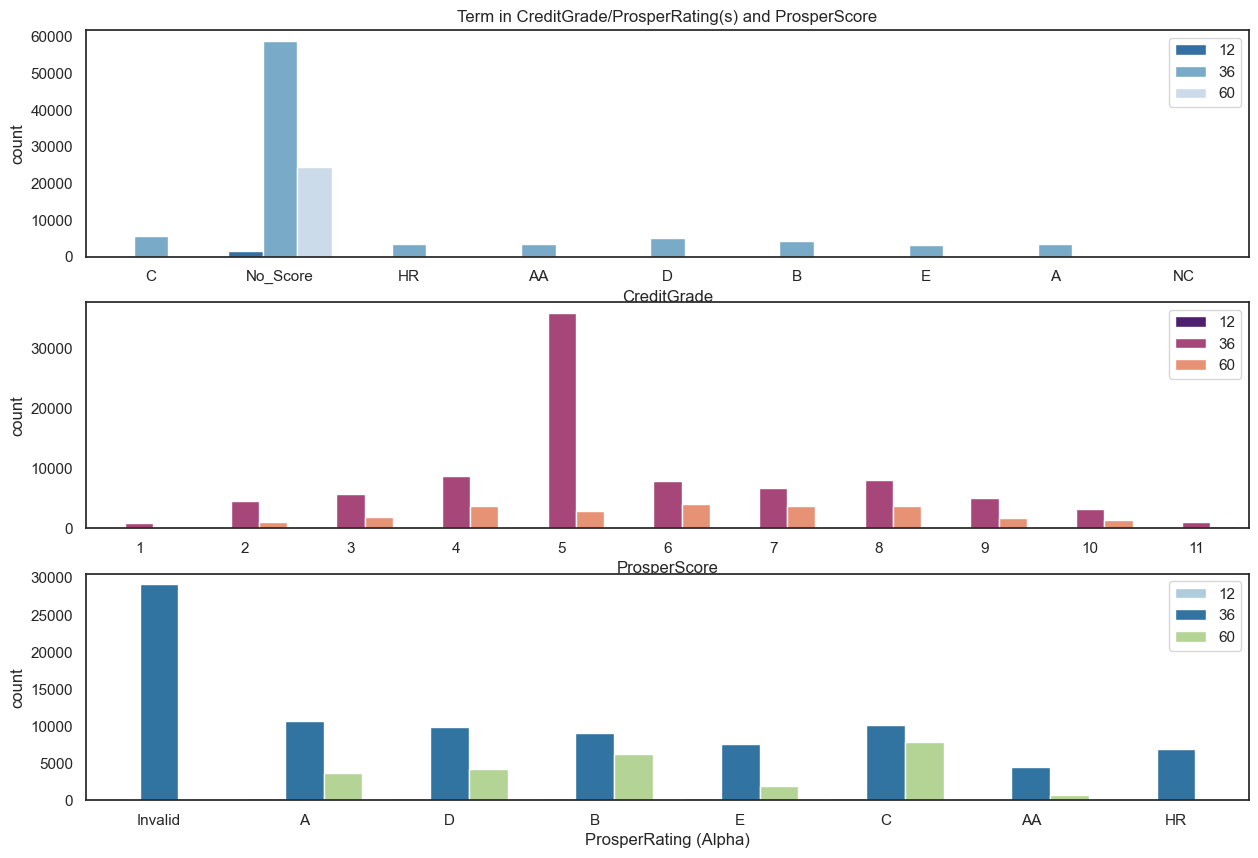

In [46]:
# Examine the relationship between CreditGrade/ProsperRating(s) and ProsperScore to loan term
fig, ax = plt.subplots(nrows=3, figsize = [15,10])

plt.subplot(3,1,1)
sns.countplot(data=df_loan, x='CreditGrade', hue='Term', palette = 'Blues_r');
plt.legend(loc=1);
plt.title("Term in CreditGrade/ProsperRating(s) and ProsperScore");


plt.subplot(3,1,2)
sns.countplot(data=df_loan, x='ProsperScore', hue='Term', palette='magma');
plt.legend(loc=1);


plt.subplot(3,1,3)
sns.countplot(data=df_loan, x='ProsperRating (Alpha)', hue='Term', palette='Paired');
plt.legend(loc=1);



Observation:
The categorical variables and the two relevant numeric variables seem to have some interestingly positive connections. People with ProsperRatings of A and C were particularly interested in the loans with 60-month terms. As was previously shown, among all credit risk groups, 36-month term loans are the most common.

## What is the relationship between Prosper Rating and Employment Status ?¶

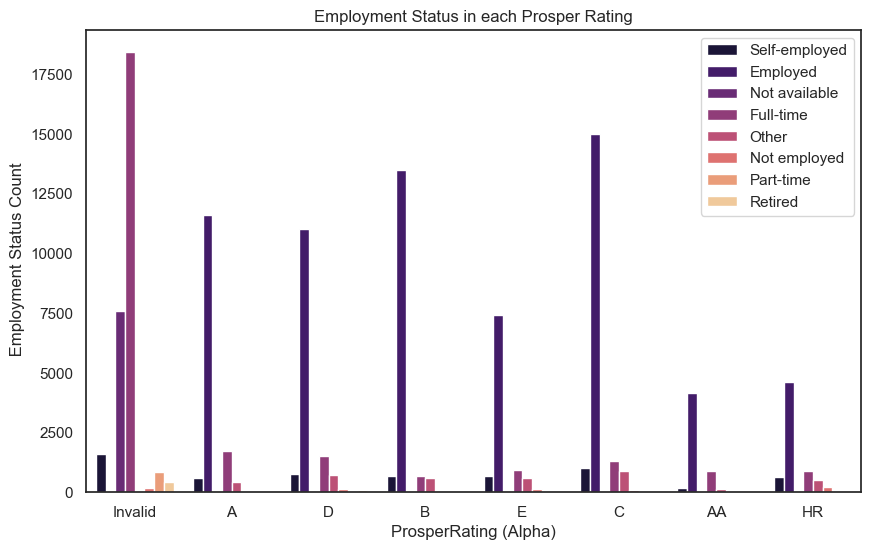

In [47]:
plt.figure(figsize = [10, 6])
sns.countplot(data=df_loan, x='ProsperRating (Alpha)', hue='EmploymentStatus', palette='magma');
plt.legend(loc=1);
plt.title("Employment Status in each Prosper Rating");
plt.ylabel(' Employment Status Count');

Observation:
As anticipated, the majority of successful loans were given to persons who were employed because they were more likely to have reliable sources of income. There is a positive relationship between Prosper rating and employment situation.

## What is the relationship Between ProsperScore,BorrowerRate and categorical Variables

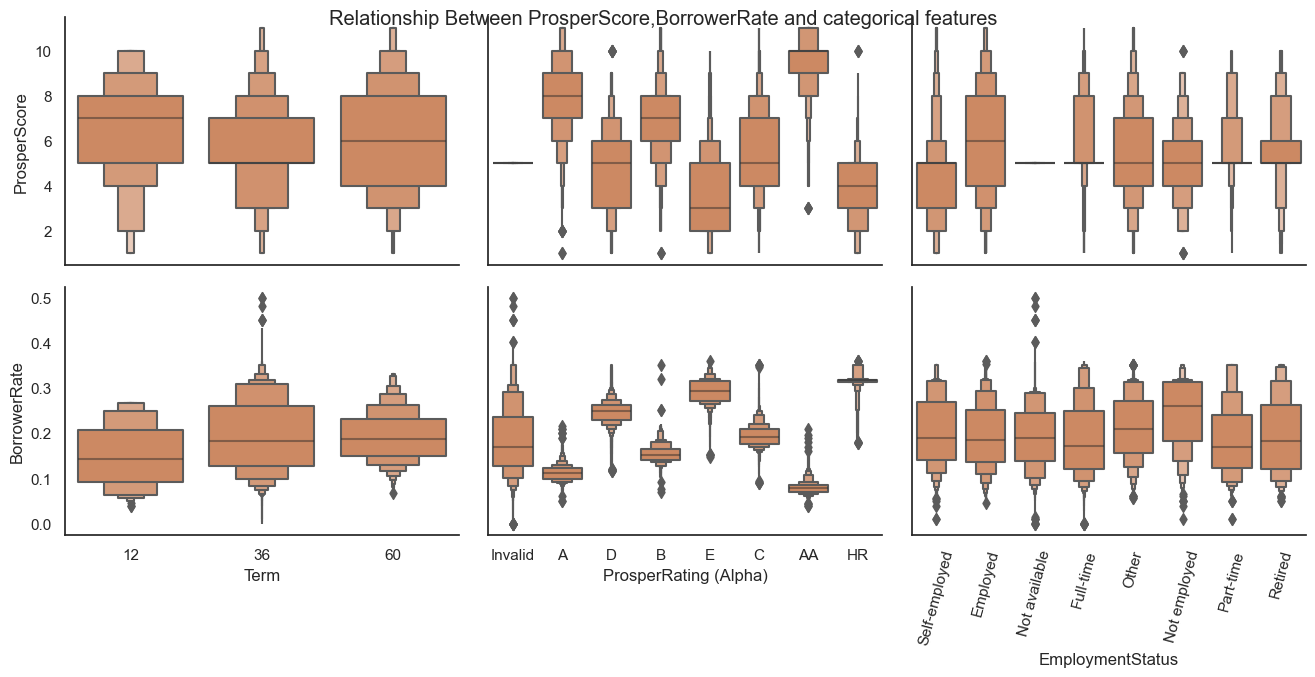

In [48]:
# plot matrix of categorical features against numeric features .

def grid(x, y, **kwargs):
    """ Great hack to boxen plot"""
    base = sns.color_palette()[1]
    sns.boxenplot(x, y, color = base)


g = sns.PairGrid(df_loan,y_vars = ['ProsperScore','BorrowerRate',], 
                                x_vars = ['Term', 'ProsperRating (Alpha)', 'EmploymentStatus'], height = 3, aspect = 1.5)
g.map(grid);
plt.xticks(rotation=75);
g.fig.suptitle('Relationship Between ProsperScore,BorrowerRate and categorical features');
plt.show();

Observation:
When comparing the distributions of the different credit risks and the borrower rate using boxen plots, it is evident that a higher (better) score is negatively connected with a lower interest rate. This argument is best illustrated by the data for the ProsperRating (Alpha) variable, where the decline is more pronounced.

## Is there any relationship between Prosper Rating VS Credit Score Average

In [49]:
df_loan['Avg_Credit_Score'] = (df_loan['CreditScoreRangeUpper'] + df_loan['CreditScoreRangeLower'])/2
df_loan['Avg_Credit_Score']

0         649.5
1         689.5
2         489.5
3         809.5
4         689.5
          ...  
113932    709.5
113933    709.5
113934    709.5
113935    689.5
113936    689.5
Name: Avg_Credit_Score, Length: 113937, dtype: float64

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


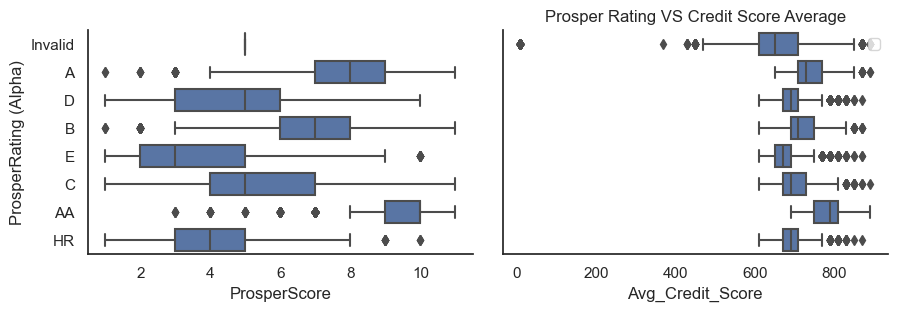

In [50]:
def box(x, y, **kwargs):
    """ Great Hack to box plot"""
    default_color = sns.color_palette()[0]
    sns.boxplot(x, y, color = default_color);
    
g = sns.PairGrid(data = df_loan, y_vars =['ProsperRating (Alpha)'] , x_vars = ['ProsperScore','Avg_Credit_Score'],
                size = 3, aspect = 1.5);    
g.map(box); 
plt.title("Prosper Rating VS Credit Score Average");

Observation:
>The graphs above demonstrate that there are modest positive trends between Prosper Rating and Prosper Score, and that the volatility of Prosper Score within each Prosper Rating is more concentrated. In each Prosper Rating, the volatility of the Credit Score Average is somewhat greater than the Prosper Score's.

# Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>This study's goal is to identify the following variables that effect loan amount and borrower rate:

1. Interest rate and Loan amount have a moderately negative association.
2. Additionally, I discovered that there are some significant and negative connections between the interest rate and the categorical/ordinal variables used. As an illustration, persons without jobs have more stringent credit requirements (higher rates) than those who have. So it's also a reliable indicator.
3. Similarly, evidence suggests that the borrower's rate is highly influenced by the borrower's Prosper rating and score. We can infer that the rate is lower the higher the score. 

## Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

There are some favorable correlations between the two relevant numerical variables and the category variables. People with ProsperRatings of A and C were particularly interested in the loans with 60-month terms. As was previously shown, among all credit risk groups, 36-month term loans are the most common.

# Multivariate Exploration

## What Month has the highest loan count and how does this affect Borrowers ARR?

In [51]:
df_loan['month'].value_counts()

Jan     11214
Oct     10539
Dec     10320
Feb     10124
Sept    10074
Nov      9952
Jul      9506
Aug      9202
Jun      8672
May      8641
Mar      8032
Apr      7661
Name: month, dtype: int64

In [52]:
df_loan['BorrowerAPR'].value_counts()

0.35797    3672
0.35643    1644
0.37453    1260
0.30532     902
0.29510     747
           ... 
0.37266       1
0.27518       1
0.18477       1
0.29961       1
0.19543       1
Name: BorrowerAPR, Length: 6677, dtype: int64

In [53]:
grouped_single = df_loan.groupby('month').agg({'BorrowerAPR': ['count', 'min', 'max', 'mean']})
print(grouped_single)

      BorrowerAPR                            
            count      min      max      mean
month                                        
Apr          7661  0.01987  0.40243  0.221548
Aug          9202  0.01650  0.41355  0.228939
Dec         10316  0.01650  0.41355  0.210130
Feb         10124  0.05927  0.51229  0.202149
Jan         11212  0.02998  0.39153  0.202577
Jul          9506  0.01315  0.41355  0.226951
Jun          8672  0.01325  0.39153  0.227227
Mar          8032  0.00653  0.50633  0.213823
May          8641  0.01315  0.41355  0.224124
Nov          9933  0.04668  0.41355  0.217472
Oct         10539  0.00653  0.42395  0.224742
Sept        10074  0.01875  0.41355  0.230978


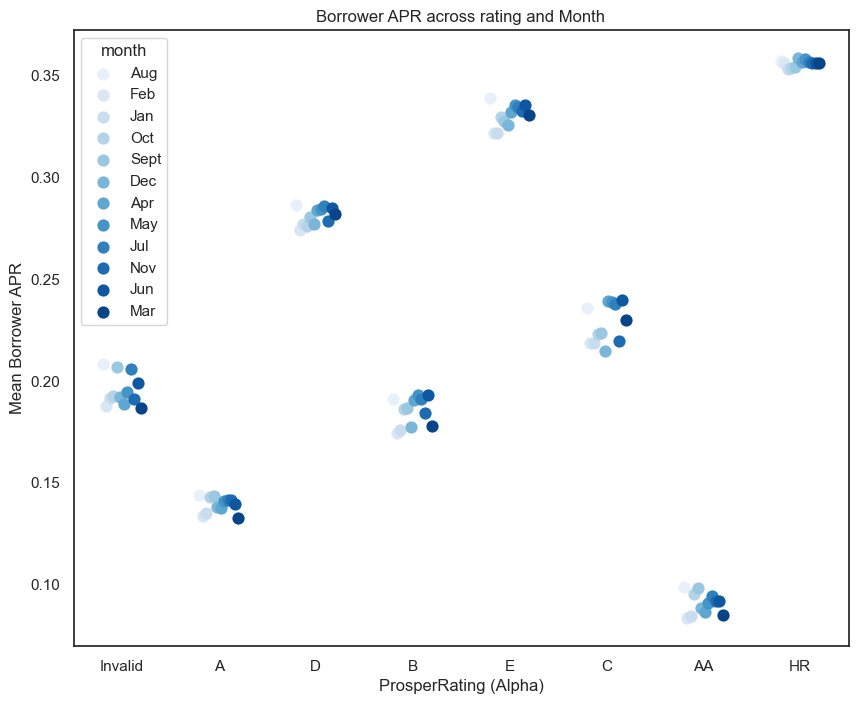

In [54]:
plt.figure(figsize = [10,8])
sns.pointplot(data = df_loan, x = 'ProsperRating (Alpha)', y = 'BorrowerAPR', hue = 'month',
           palette = 'Blues', linestyles = '', dodge = 0.4, ci=None)
plt.title('Borrower APR across rating and Month')
plt.ylabel('Mean Borrower APR');

Observation:
Despite the month of January having the highest loan count, there isnt significant relationship between this month and cost of borrowing as the borrowers ARR experiences it peak rate in month between February and March as displayed in the diagram above.

## Does Prosper consider Collateral(Home Ownership) in assigning rating and disbursement of loans?

<Figure size 1000x800 with 0 Axes>

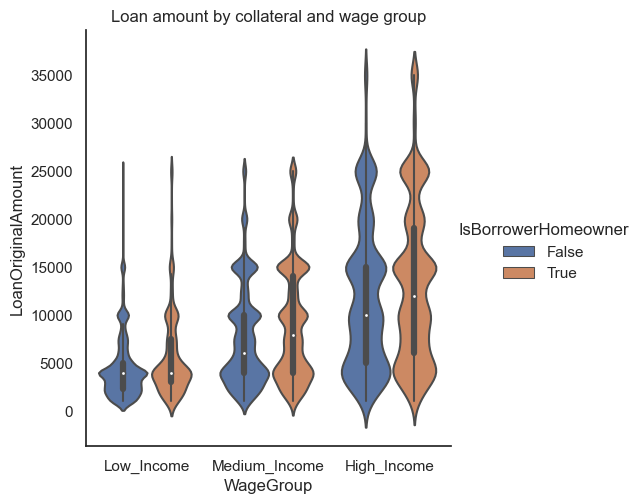

In [55]:
plt.figure(figsize = [10,8])
g = sns.catplot(data = df_loan, x = 'WageGroup', y = 'LoanOriginalAmount',hue = 'IsBorrowerHomeowner', kind="violin")
plt.title('Loan amount by collateral and wage group');

Observation:
The graph above explains how high income borrowers with collateral are more likely to receive loans with higher amounts from Prosper. The best risk management techniques are surely followed in this situation.

## Is there a relationship Between Loan Status, ProsperScore and ProsperRating?

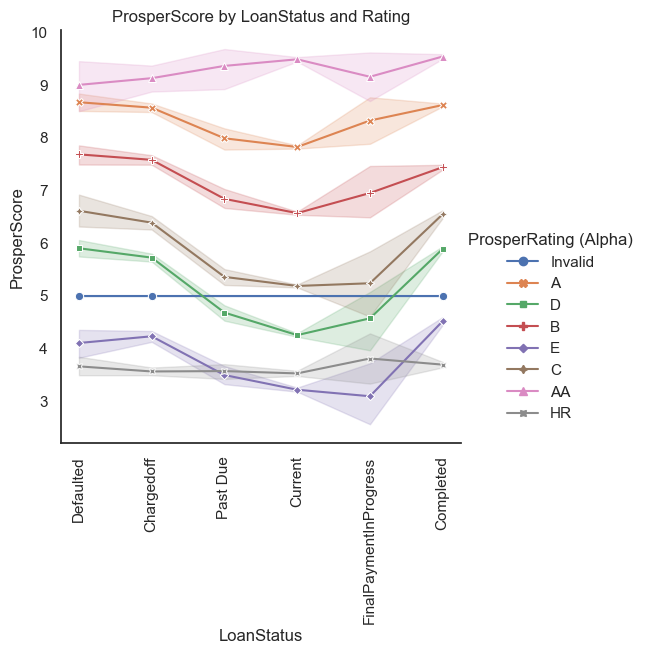

In [56]:
sns.relplot(x="LoanStatus", y="ProsperScore",data=df_loan,kind="line",
            style="ProsperRating (Alpha)",hue="ProsperRating (Alpha)",markers=True,dashes=False)
plt.xticks(rotation= 90)
plt.title('ProsperScore by LoanStatus and Rating')
plt.show()


Observation:
This demonstrates that current loans with a rating of 9 are classified as AA by Prosper. This demonstrates that only high quality loans with little risk are given to borrowers in accordance with Prosper's risk management techniques. Investors' trust in Prosper as a platform where risk and return are balanced will increase as a result of this strategy.

# Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


In this section, I examined the most explanatory determinants in relation to loan and interest rate.

The multivariate analysis here revealed that Prosper applies more stringent credit requirements to customers who are in default (past due, charged-off payments) (higher interest rates). These individuals also have lower credit scores than those with high status.

It's also important to keep in mind that various rates are employed depending on maturities. In other words, rates for 5-year loans are often higher than rates for loans with other maturities, regardless of the prosper grade (with the exception of the E rating, which has rates the same for 3- and 5-year loans, and the HR rating).This is obvious; a longer duration increases the likelihood of a default.

Those with high ratings naturally pay the lowest prices, as is usually said. It's noteworthy that there are just three years' worth of loans in this dataset for HR ratings. In addition, loans that have been charged off or defaulted on often have borrower APRs that are higher than loans that have been completed or are currently in progress for all Prosper Ratings other than "A" and "AA" (good records). Last but not least, a better income and a collateral help to get a bigger loan amount. It is clear that having a property is important for getting a bigger loan.

# Were there any interesting or surprising interactions between features?

I observed that since 2011, there hasn't been a major difference between the rates charged to homeowners and non-homeowners.